<a href="https://colab.research.google.com/github/WagnerLopesCardozo/Analise_de_Algoritmos_e_Estrutura_de_Dados/blob/main/Wagner_LopesCardozo_Aula4Pr%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

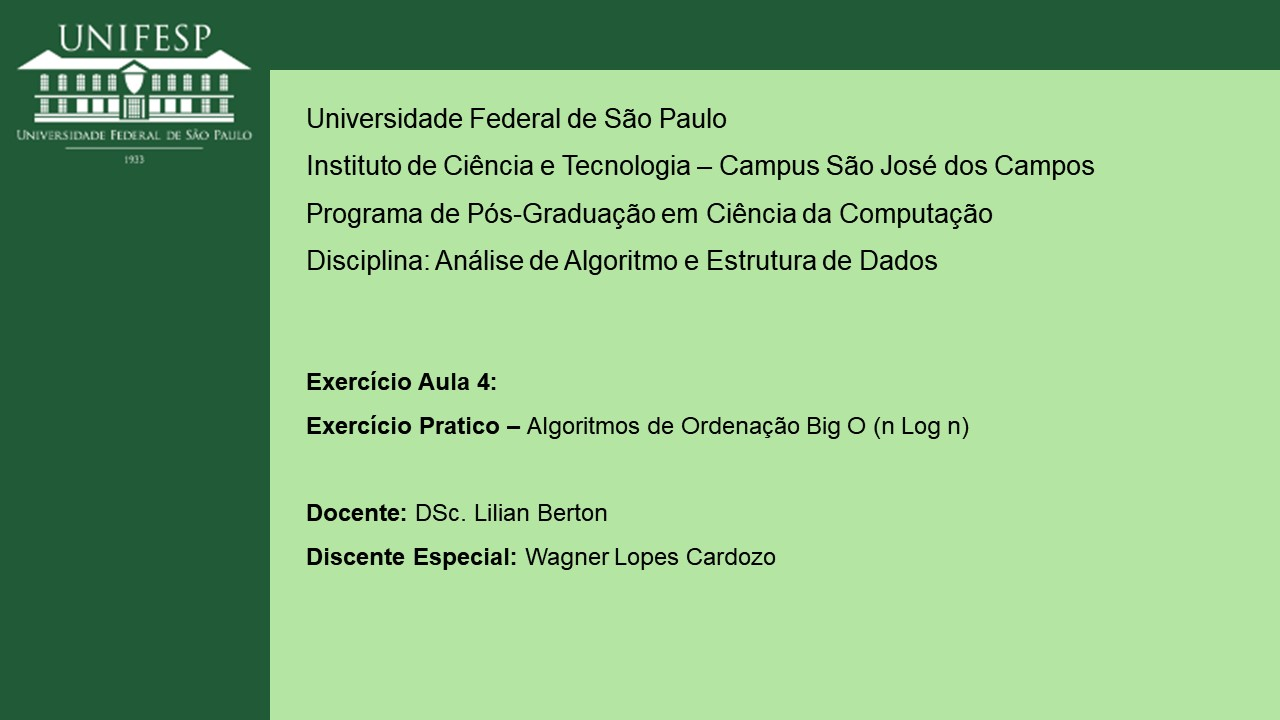

##Os quatro algoritmos abaixo apresentam complexidade Big O (n Log n), porém é importante observar que o algoritmo de ordenação Quick Sort dependendo da escolha do pivot, pode ter complexidade assintótica Big O (n²).

##Os algoritmos executam a ordenação de três vetores com 100.000 elementos cada vetor, preenchidos de forma aleatória, em ordem crescente e decrescente, e são ordenados aleatoriamente, de forma crescente e decrescente, tomando-se o tempo de ordenção para cada um dos três vetores.

#<font color=lightgreen>Heap Sort

In [ ]:
import time
import numpy as np

# Implementação do algoritmo Heap Sort
def heapify(arr, n, i):
    largest = i  # Inicializa o maior como a raiz
    l = 2 * i + 1  # Filho à esquerda
    r = 2 * i + 2  # Filho à direita

    # Verifica se o filho à esquerda do nó raiz existe e é maior que a raiz
    if l < n and arr[l] > arr[largest]:
        largest = l

    # Verifica se o filho à direita do nó raiz existe e é maior que o maior até agora
    if r < n and arr[r] > arr[largest]:
        largest = r

    # Se o maior não for a raiz
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # Troca

        # Aplica heapify na raiz
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    # Constrói o max heap
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    # Extrai um por um os elementos do heap
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]  # Troca
        heapify(arr, i, 0)

# Gera os três vetores com 100.000 elementos cada
random_vector = np.random.randint(1, 1000001, size=100000)
sorted_vector = np.arange(1, 100001)
reverse_sorted_vector = np.arange(100000, 0, -1)

# Ordena e mede o tempo para cada vetor
# Vetor aleatório
start_time = time.time()
heap_sort(random_vector)
print("Vetor aleatório ordenado:\n", random_vector[:10], "...", random_vector[-10:])  # Mostra os primeiros e últimos 10 elementos
print(f"Tempo de execução (aleatório): {time.time() - start_time:.4f} segundos\n")

# Vetor ordenado em ordem crescente
start_time = time.time()
heap_sort(sorted_vector)
print("Vetor ordenado em ordem crescente:\n", sorted_vector[:10], "...", sorted_vector[-10:])
print(f"Tempo de execução (crescente): {time.time() - start_time:.4f} segundos\n")

# Vetor ordenado em ordem decrescente
start_time = time.time()
heap_sort(reverse_sorted_vector)
print("Vetor ordenado em ordem decrescente:\n", reverse_sorted_vector[-10:], "...", reverse_sorted_vector[:10])
print(f"Tempo de execução (decrescente): {time.time() - start_time:.4f} segundos\n")


Vetor aleatório ordenado:
 [  8   8  12  31  49  62  65  92 116 127] ... [999882 999883 999890 999892 999896 999899 999912 999915 999922 999982]
Tempo de execução (aleatório): 2.0899 segundos

Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [ 99991  99992  99993  99994  99995  99996  99997  99998  99999 100000]
Tempo de execução (crescente): 2.1124 segundos

Vetor ordenado em ordem decrescente:
 [ 99991  99992  99993  99994  99995  99996  99997  99998  99999 100000] ... [ 1  2  3  4  5  6  7  8  9 10]
Tempo de execução (decrescente): 1.8746 segundos



#<font color=lightgreen>Merge Sort

##OBS: Á exibição do vetor ordenado de forma decrescente neste algoritmo não está muito boa, foi usado o Chat GPT para tentar resolver esta exibição na tela, porém sem resultados bons para a exibição do vetor ordenado de forma decrescente.

In [ ]:
import time
import numpy as np

# Implementação do algoritmo Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2  # Encontra o meio do vetor
        left_half = arr[:mid]  # Divide o vetor em duas metades
        right_half = arr[mid:]

        merge_sort(left_half)  # Ordena a primeira metade
        merge_sort(right_half)  # Ordena a segunda metade

        i = j = k = 0

        # Copia os dados para os arrays temporários left_half e right_half
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        # Verifica se ainda há elementos para copiar na left_half
        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        # Verifica se ainda há elementos para copiar na right_half
        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

# Gera os três vetores com 100.000 elementos cada
random_vector = np.random.randint(1, 1000001, size=100000).copy()
sorted_vector = np.arange(1, 100001).copy()
reverse_sorted_vector = np.arange(100000, 0, -1).copy()

# Ordena e mede o tempo para cada vetor
# Vetor aleatório
start_time = time.time()
merge_sort(random_vector)
print("Vetor aleatório ordenado:\n", random_vector[:10], "...", random_vector[-10:])  # Mostra os primeiros e últimos 10 elementos
print(f"Tempo de execução (aleatório): {time.time() - start_time:.4f} segundos\n")

# Vetor ordenado em ordem crescente
start_time = time.time()
merge_sort(sorted_vector)
print("Vetor ordenado em ordem crescente:\n", sorted_vector[:10], "...", sorted_vector[-10:])
print(f"Tempo de execução (crescente): {time.time() - start_time:.4f} segundos\n")

# Vetor ordenado em ordem decrescente
# Para ordenar de forma decrescente, é necessário inverter o vetor ordenado crescente
start_time = time.time()
merge_sort(reverse_sorted_vector)
reverse_sorted_vector = reverse_sorted_vector[::-1]  # Inverte o vetor para obter ordem decrescente
print("Vetor ordenado em ordem decrescente:\n", reverse_sorted_vector[:10], "...", reverse_sorted_vector[-10:])
print(f"Tempo de execução (decrescente): {time.time() - start_time:.4f} segundos\n")


Vetor aleatório ordenado:
 [2 2 2 2 2 2 2 2 2 2] ... [ 45177  45177  45177 325959 325959 325959 325959 325959 325959 325959]
Tempo de execução (aleatório): 1.8433 segundos

Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [ 99991  99992  99993  99994  99995  99996  99997  99998  99999 100000]
Tempo de execução (crescente): 1.3223 segundos

Vetor ordenado em ordem decrescente:
 [1 1 1 1 1 1 1 1 1 1] ... [1 1 1 1 1 1 1 1 1 1]
Tempo de execução (decrescente): 0.8869 segundos



#<font color=lightgreen>Quick Sort

##Foi escolhido os pivos:

* Primeiro Elemento: O pivô é o primeiro elemento do vetor.

* Último Elemento: O pivô é o último elemento do vetor.

* Elemento do Meio: O pivô é o elemento localizado no meio do vetor.

* Elemento Aleatório: Um elemento aleatório é escolhido como pivô.

* Mediana de Três: O pivô é escolhido como a mediana de três elementos: o primeiro, o último e o do meio.

In [ ]:
import time
import numpy as np
import sys

# Ajuste do limite de recursão
sys.setrecursionlimit(10000)     #Para evitar erros no algoritmo

# Função de ordenação por inserção para vetores pequenos
def insertion_sort(arr, low, high):
    for i in range(low + 1, high + 1):
        key = arr[i]
        j = i - 1
        while j >= low and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Implementação do algoritmo Quick Sort de forma iterativa
def quick_sort(arr, low, high, pivot_strategy):
    stack = [(low, high)]

    while stack:
        low, high = stack.pop()
        if high - low <= 10:  # Se o vetor for pequeno, use a ordenação por inserção
            insertion_sort(arr, low, high)
            continue
        if low < high:
            pi = partition(arr, low, high, pivot_strategy)
            stack.append((low, pi - 1))
            stack.append((pi + 1, high))

def partition(arr, low, high, pivot_strategy):
    if pivot_strategy == "first":
        pivot = arr[low]
        pivot_index = low
    elif pivot_strategy == "last":
        pivot = arr[high]
        pivot_index = high
    elif pivot_strategy == "middle":
        mid = (low + high) // 2
        pivot = arr[mid]
        pivot_index = mid
    elif pivot_strategy == "random":
        pivot_index = np.random.randint(low, high + 1)
        pivot = arr[pivot_index]
    elif pivot_strategy == "median_of_three":
        mid = (low + high) // 2
        a, b, c = arr[low], arr[mid], arr[high]
        pivot = sorted([a, b, c])[1]
        if pivot == a:
            pivot_index = low
        elif pivot == b:
            pivot_index = mid
        else:
            pivot_index = high
    else:
        raise ValueError("Invalid pivot strategy")

    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]  # Move pivot
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

# Função principal para execução do Quick Sort
def run_quick_sort(arr, pivot_strategy):
    arr_copy = arr.copy()  # Faz uma cópia do vetor para não modificar o original
    start_time = time.time()
    quick_sort(arr_copy, 0, len(arr_copy) - 1, pivot_strategy)
    duration = time.time() - start_time
    return arr_copy, duration

# Gera os três vetores com 50.000 elementos cada
random_vector = np.random.randint(1, 1000001, size=50000)
sorted_vector = np.arange(1, 50001)
reverse_sorted_vector = np.arange(50000, 0, -1)

# Testa as diferentes estratégias de pivô
pivot_strategies = ["first", "last", "middle", "random", "median_of_three"]

for strategy in pivot_strategies:
    print(f"Pivot Strategy: {strategy}")

    # Vetor aleatório
    sorted_vector_random, duration_random = run_quick_sort(random_vector, strategy)
    print("Vetor aleatório ordenado:\n", sorted_vector_random[:10], "...", sorted_vector_random[-10:])
    print(f"Tempo de execução (aleatório): {duration_random:.4f} segundos\n")

    # Vetor ordenado em ordem crescente
    sorted_vector_sorted, duration_sorted = run_quick_sort(sorted_vector, strategy)
    print("Vetor ordenado em ordem crescente:\n", sorted_vector_sorted[:10], "...", sorted_vector_sorted[-10:])
    print(f"Tempo de execução (crescente): {duration_sorted:.4f} segundos\n")

    # Vetor ordenado em ordem decrescente (ordenado do maior para o menor)
    sorted_vector_reverse, duration_reverse = run_quick_sort(reverse_sorted_vector, strategy)
    print("Vetor ordenado em ordem decrescente (exibido do maior para o menor):\n", sorted_vector_reverse[::-1][:10], "...", sorted_vector_reverse[::-1][-10:])
    print(f"Tempo de execução (decrescente): {duration_reverse:.4f} segundos\n")


Pivot Strategy: first
Vetor aleatório ordenado:
 [ 27  61  77  91 126 132 134 144 211 235] ... [999830 999835 999858 999867 999903 999905 999947 999980 999993 999999]
Tempo de execução (aleatório): 0.3944 segundos

Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [49991 49992 49993 49994 49995 49996 49997 49998 49999 50000]
Tempo de execução (crescente): 214.8106 segundos

Vetor ordenado em ordem decrescente (exibido do maior para o menor):
 [50000 49999 49998 49997 49996 49995 49994 49993 49992 49991] ... [10  9  8  7  6  5  4  3  2  1]
Tempo de execução (decrescente): 520.7754 segundos

Pivot Strategy: last
Vetor aleatório ordenado:
 [ 27  61  77  91 126 132 134 144 211 235] ... [999830 999835 999858 999867 999903 999905 999947 999980 999993 999999]
Tempo de execução (aleatório): 0.3786 segundos

Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [49991 49992 49993 49994 49995 49996 49997 49998 49999 50000]
Tempo de execução (crescente): 82

#<font color=lightgreen>Shell Sort

##Incrementos h (sequências)

* Shell (1959)

* Frank & Lazarus (1960)

* Pratt (1971)

* Incerpi & Sedgewick (1985)


In [ ]:
import time
import numpy as np

# Implementação do algoritmo Shell Sort
def shell_sort(arr, gap_sequence):
    n = len(arr)
    for gap in gap_sequence:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp

# Sequências de incrementos (h)
def shell_sequence_shell(n):
    sequence = []
    gap = n // 2
    while gap > 0:
        sequence.append(gap)
        gap //= 2
    return sequence

def shell_sequence_frank_lazarus(n):
    sequence = []
    k = 1
    while (gap := 2**k - 1) < n:
        sequence.append(gap)
        k += 1
    return sequence

def shell_sequence_pratt(n):
    sequence = []
    k = 0
    while True:
        m = 0
        while (gap := 2**k * 3**m + 1) < n:
            sequence.append(gap)
            m += 1
        if 2**k > n:
            break
        k += 1
    sequence.sort(reverse=True)
    return sequence

def shell_sequence_incerpi_sedgewick(n):
    sequence = []
    h = 1
    while h < n:
        sequence.append(h)
        h = 9 * h + 1
    sequence.reverse()
    return sequence

# Gera os três vetores com 50.000 elementos cada
random_vector = np.random.randint(1, 1000001, size=50000)
sorted_vector = np.arange(1, 50001)
reverse_sorted_vector = np.arange(50000, 0, -1)

# Testa o Shell Sort com diferentes sequências de incrementos
gap_sequences = {
    "Shell (1959)": shell_sequence_shell(len(random_vector)),
    "Frank & Lazarus (1960)": shell_sequence_frank_lazarus(len(random_vector)),
    "Pratt (1971)": shell_sequence_pratt(len(random_vector)),
    "Incerpi & Sedgewick (1985)": shell_sequence_incerpi_sedgewick(len(random_vector))
}

for name, gap_sequence in gap_sequences.items():
    print(f"\nGap Sequence: {name}")

    # Vetor aleatório
    sorted_vector_random = random_vector.copy()
    start_time = time.time()
    shell_sort(sorted_vector_random, gap_sequence)
    print("Vetor aleatório ordenado:\n", sorted_vector_random[:10], "...", sorted_vector_random[-10:])
    print(f"Tempo de execução (aleatório): {time.time() - start_time:.4f} segundos")

    # Vetor ordenado em ordem crescente
    sorted_vector_sorted = sorted_vector.copy()
    start_time = time.time()
    shell_sort(sorted_vector_sorted, gap_sequence)
    print("Vetor ordenado em ordem crescente:\n", sorted_vector_sorted[:10], "...", sorted_vector_sorted[-10:])
    print(f"Tempo de execução (crescente): {time.time() - start_time:.4f} segundos")

    # Vetor ordenado em ordem decrescente (exibido do maior para o menor)
    sorted_vector_reverse = reverse_sorted_vector.copy()
    start_time = time.time()
    shell_sort(sorted_vector_reverse, gap_sequence)
    print("Vetor ordenado em ordem decrescente (exibido do maior para o menor):\n", sorted_vector_reverse[::-1][:10], "...", sorted_vector_reverse[::-1][-10:])
    print(f"Tempo de execução (decrescente): {time.time() - start_time:.4f} segundos")



Gap Sequence: Shell (1959)
Vetor aleatório ordenado:
 [ 28  29  31  39  43  58  71  85  92 102] ... [999849 999861 999869 999916 999931 999941 999945 999958 999979 999996]
Tempo de execução (aleatório): 0.8216 segundos
Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [49991 49992 49993 49994 49995 49996 49997 49998 49999 50000]
Tempo de execução (crescente): 0.2751 segundos
Vetor ordenado em ordem decrescente (exibido do maior para o menor):
 [50000 49999 49998 49997 49996 49995 49994 49993 49992 49991] ... [10  9  8  7  6  5  4  3  2  1]
Tempo de execução (decrescente): 0.8291 segundos

Gap Sequence: Frank & Lazarus (1960)
Vetor aleatório ordenado:
 [ 28  29  31  39  43  58  71  85  92 102] ... [999849 999861 999869 999916 999931 999941 999945 999958 999979 999996]
Tempo de execução (aleatório): 312.2888 segundos
Vetor ordenado em ordem crescente:
 [ 1  2  3  4  5  6  7  8  9 10] ... [49991 49992 49993 49994 49995 49996 49997 49998 49999 50000]
Tempo de execuçã

#<font color=lightgreen>Recurso Computacional:

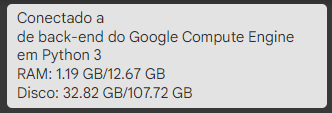

* Foi solicitado ajuda ao Chat GPD ajuda para implementar os incrementos h para o algoritmo Shell Sort e também para o ajuste do limite da recursão para o algoritmo Quick Sort, bem como também para a implementação dos pivos.

#<font color=lightgreen>Referências:

* Stack Over Flow, Heap Sort: how to sort? - https://stackoverflow.com/questions/13979714/heap-sort-how-to-sort

* Geeks for Geeks, Heap Sort – Data Structures and Algorithms Tutorials, https://www.geeksforgeeks.org/heap-sort/

* Stack Over Flow, Mergesort with Python, https://stackoverflow.com/questions/18761766/mergesort-with-python

* Geeks for Geeks, Python Program for Merge Sort, https://www.geeksforgeeks.org/python-program-for-merge-sort/

* Stack Over Flow, Quicksort with Python, https://stackoverflow.com/questions/18262306/quicksort-with-python

* Geeks for Geeks, Quick Sort Algorithm, https://www.geeksforgeeks.org/quick-sort-algorithm/

* Stack Over Flow, How to implement different sequences in shell sort in python, https://stackoverflow.com/questions/72005446/how-to-implement-different-sequences-in-shell-sort-in-python

* Geeks for Geeks, Python Program for ShellSort, https://www.geeksforgeeks.org/python-program-for-shellsort/

* Wikipedia, Shellsort, https://en.wikipedia.org/wiki/Shellsort
